In [1]:
# Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import json 
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')

# Data Processing Functions

In [2]:
# Function for cleaning the text
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score): # Polarity goes as a score here
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Setting Up Twitter Connection

In [3]:
df = pd.read_excel('twitter_keys.xlsx', index_col='Name')

In [4]:
auth = tweepy.OAuthHandler(df.loc['API_key', 'Code'], df.loc['API_key_secret', 'Code'])
auth.set_access_token(df.loc['Access_token', 'Code'], df.loc['Access_token_secret', 'Code'])

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK. You are connected")
except:
    print("Error during authentication")

Authentication OK. You are connected


# Collecting Tweet Data Sample in Python

In [5]:
# Define the search term and the date_since date as variables
search_words = "@DonaldTrump"
date_since = "2020-08-01"

In [6]:
# https://towardsdatascience.com/tweepy-for-beginners-24baf21f2c25

new_search = search_words + " -filter:retweets"
date_since = "2020-08-01"

tweet_df = pd.DataFrame()

tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,
                   tweet_mode = 'extended').items()

# Iterate and print tweets
for tweet in tweets:
    data = pd.DataFrame({
                    'screen_name': [tweet.user.screen_name],
                    'text': [tweet.full_text],
                    'created_at': [tweet.created_at],
                    'location': [tweet.user.location],
                })
    tweet_df = tweet_df.append(data)

tweet_df = tweet_df.reset_index(drop=True)
tweet_df.to_csv('tweets_output.csv', index= False)

In [8]:
print(tweet_df.shape)
tweet_df.tail(10)

(1479, 4)


,screen_name,text,created_at,location
1469,rustysh80302204,@donaldtrump @joebiden @presssec @nypost @was...,2020-10-30 20:40:13,
1470,rob_utmost,@majornelson Gotta be @DonaldTrump just becaus...,2020-10-30 20:33:22,
1471,TweetyAunty,May be if only #doctors spend more time on the...,2020-10-30 19:41:13,
1472,lmcameron1313,RT @lmcameron1313: @DonaldTrump @realDonaldTru...,2020-10-30 19:37:49,"Boston, MA"
1473,MissHap63238277,@DonaldTrump FROM EX REPUBLICANS..\nTRUMP &amp...,2020-10-30 19:23:18,
1474,LindaMo10445971,@DonaldTrump The Equal Time Rule requires stat...,2020-10-30 19:01:14,
1475,spike1955912,@DonaldTrump Jr. Hey Diaper Don. You should r...,2020-10-30 18:16:15,
1476,DiapersTrump,"@DonaldTrump \nTrump, you are using\nTax Payer...",2020-10-30 17:49:06,
1477,CPA_Party,This election is going to be a landslide for @...,2020-10-30 17:23:16,United Kingdom
1478,DiapersTrump,@DonaldTrump \nTHE BROKEN REPUBLICAN\nPARTY..w...,2020-10-30 17:02:18,


# Checking Other Collected data from R

In [9]:
# D1: search term “Donald Trump”, number of tweets=750, date range 10-02-2020 to 11-02-2020, 
# result type=Mixed which means returns both top results and most recent 

data1 = pd.read_excel('d1.xlsx')
data1.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,"@Kyr_AI Donald Trump is a white supremacist, f...",False,0,Kyr_AI,2020-11-01 23:59:59,False,1.323051e+18,1323052198671060995,1.285685e+18,"<a href=""https://cheapbotsdonequick.com"" rel=""...",AlexandeAI,0,False,False,NaN,NaN
1,"@lynnwood57 @realDonaldTrump ""Trump has been s...",False,0,lynnwood57,2020-11-01 23:59:59,True,1.323050e+18,1323052198415241221,5.363553e+08,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SomeRandomGuy5,0,False,False,NaN,NaN
2,"RT @ABCPolitics: Joe Biden in Philadelphia: ""T...",False,0,NaN,2020-11-01 23:59:59,False,NaN,1323052197765066754,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NellB10522733,223,True,False,NaN,NaN
3,RT @JoeBiden: I promise you this: I’ll end Don...,False,0,NaN,2020-11-01 23:59:59,False,NaN,1323052196724920320,NaN,"<a href=""http://twitter.com/download/android"" ...",Grace5320,28325,True,False,NaN,NaN
4,RT @DrJenGunter: I don’t think I’ve ever hated...,False,0,NaN,2020-11-01 23:59:59,False,NaN,1323052196271779844,NaN,"<a href=""http://twitter.com/download/iphone"" r...",uwulution,555,True,False,NaN,NaN


In [10]:
df1 = pd.DataFrame(data1['text'])

df1['text'] = df1['text'].apply(cleanTxt)
df1['Subjectivity'] = df1['text'].apply(getSubjectivity)
df1['Polarity'] = df1['text'].apply(getPolarity)
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)
df1.head()

,text,Subjectivity,Polarity,Analysis
0,"_AI Donald Trump is a white supremacist, full ...",0.275,0.175,Positive
1,"57 ""Trump has been stiffing American steel wo...",0.500,0.300,Positive
2,": Joe Biden in Philadelphia: ""To beat the viru...",0.000,0.000,Neutral
3,: I promise you this: I’ll end Donald Trump’s ...,0.000,0.000,Neutral
4,: I don’t think I’ve ever hated someone so vis...,0.800,-0.850,Negative


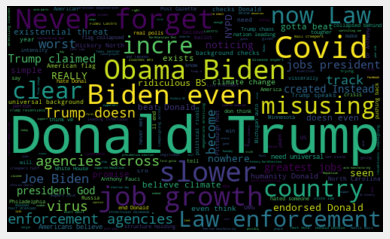

In [11]:
# word cloud visualization
allWords = ' '.join([twts for twts in df1['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=80).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [12]:
# Printing some of the positive tweets 

print('Printing positive tweets:\n')
j=1
sortedDF1 = df1.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, 15):
    if( sortedDF1['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF1['text'][i])
        print()
        j= j+1

Printing positive tweets:

1) _AI Donald Trump is a white supremacist, full stop. If you vote for him again, you’re a white supremacist, full stop.

2) 57  "Trump has been stiffing American steel workers on his own construction projects for y… 

3) : Donald Trump claimed he would be "the greatest jobs president God ever created."

Instead, he's on track to become the worst…

4) The American Flag would like to stop being near Donald Trump. 

5) : If it wasn't clear to you before, it should be by now. Law enforcement agencies across the country are misusing their incre…

6) The stock market has made its prediction about who will win the election  SmartNews



In [13]:
# Printing some of the top negative tweets 

print('Printing negative tweets:\n')
j=1
sortedDF1 = df1.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(sortedDF1.shape[0]-20, sortedDF1.shape[0]):
    if (sortedDF1['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF1['text'][i])
        print()
        j=j+1

Printing negative tweets:

1) THIS VIDEO IS WRONG, DONALD TRUMP LOVES THIS COUNTRY AND WE ALL KNOW IT 

2) : BREAKING: Donald Trump just claimed that Fidel Castro is controlling Joe Biden.

Castro has been dead for 4 years.

3) : OMG: as Donald Trump speaks in Hickory, North Carolina the structure holding up the American flag collapsed behind the cro…

4) : What you should REALLY be noticing about this ridiculous BS is that the NYPD are nowhere to be seen.

They endorsed Donald…

5) : I don’t think I’ve ever hated someone so viscerally and with this intensity who I’ve never met in person than I hate Donal…

6) : What you should REALLY be noticing about this ridiculous BS is that the NYPD are nowhere to be seen.

They endorsed Donald…



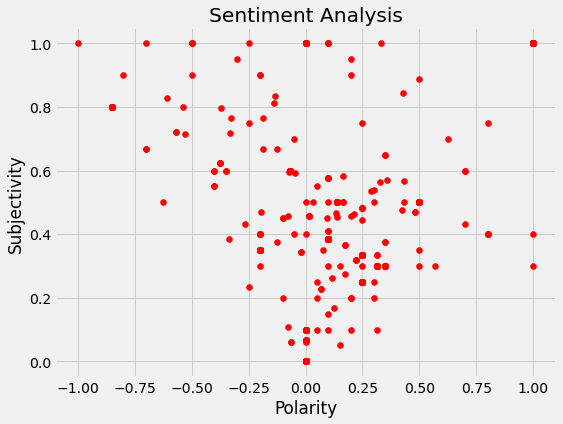

In [14]:
# Plotting polarity and subjectivity

plt.figure(figsize=(8,6)) 
plt.scatter(df1["Polarity"], df1["Subjectivity"], color='Red') 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

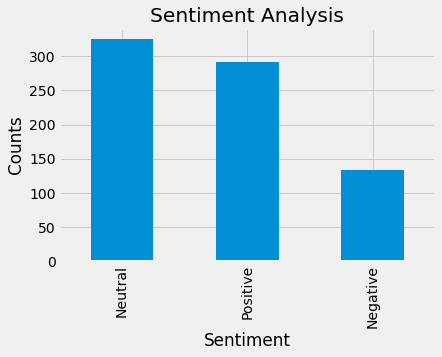

In [15]:
# Plotting and visualizing the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df1['Analysis'].value_counts().plot(kind = 'bar')
plt.show()